#### Задача 8.4

In [803]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

%matplotlib inline

In [804]:
#загружаем данные
real_lambda = 88
t_0 = 300
t = 90000

data = np.loadtxt('6.csv', delimiter=',', skiprows=3)

Берем в качестве априорного $\Gamma(\alpha, \beta)$.

Получаем для $\lambda$ оценку: $\lambda^* = \frac{\beta + \sum_{i=1}^n x_i}{\alpha + n}$

Значит $\alpha$ и $\beta$ можно рассматривать так: до эксперимента проведено $\alpha$ испытаний и полученная
сумма равна $\beta$. Правда не очень понятно, чем это поможет.

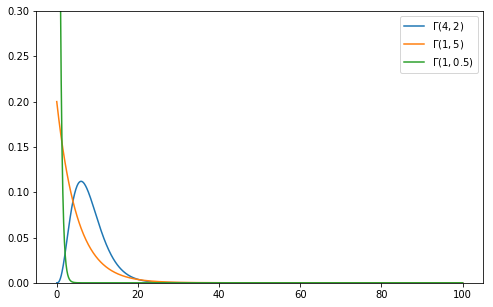

In [805]:
#смотрим на плотность - вдруг поможет
example_args = ((4, 2), (1, 5), (1, 0.5))
plt.figure(figsize=(8,5))
for arg in example_args:
    plt.plot(x, sps.gamma.pdf(x, arg[0], scale=arg[1]),
             label="$\Gamma({}, {})$".format(arg[0], arg[1]))
plt.legend()
plt.ylim(0, 0.3)
plt.show()

#выбираю параметры априорного
args = (1, 10)

Из графика видно: при $\alpha$ отличным от $1$ мы выделяем какие-то $\lambda$ - это плохо (при увеличении занижаем реальные $\lambda$, при уменьшении, наоборот, завышаем). Следовательно берем $\alpha = 1$. Непонятно, что делать с $\beta$, возьмем то, при котором график более пологий.

In [806]:
def bayes_est(x, a, b):
    return (b + x.sum()) / (a + len(x))

In [807]:
#разница между выходами из строя - по ней оцениваем lambda
delta = np.array([data[i] - data[i - 1] for i in range(1, len(data))])
delta[0] = data[0]

operation_amount = t // t_0
num_of_broken = np.zeros(operation_amount) #количеcтво сломанных серверов к моменту time[i]
time = np.zeros(operation_amount) #время с шагом t_0
lambda_ = np.zeros(operation_amount) #байесовские оценки lambda
lambda_[0] = args[0] / args[1]
refined_prediction = np.zeros(operation_amount) #предсказанные значения
refined_prediction[0] = lambda_[0] * t

for i in range(1, operation_amount):
    time[i] = t_0 + time[i - 1]
    known_data = np.shape(np.where(data <= time[i]))[1]
    num_of_broken[i] = known_data
    lambda_[i] = bayes_est(delta[:known_data], args[0], args[1])
    refined_prediction[i] = 1 / lambda_[i] * (t - time[i]) + num_of_broken[i]

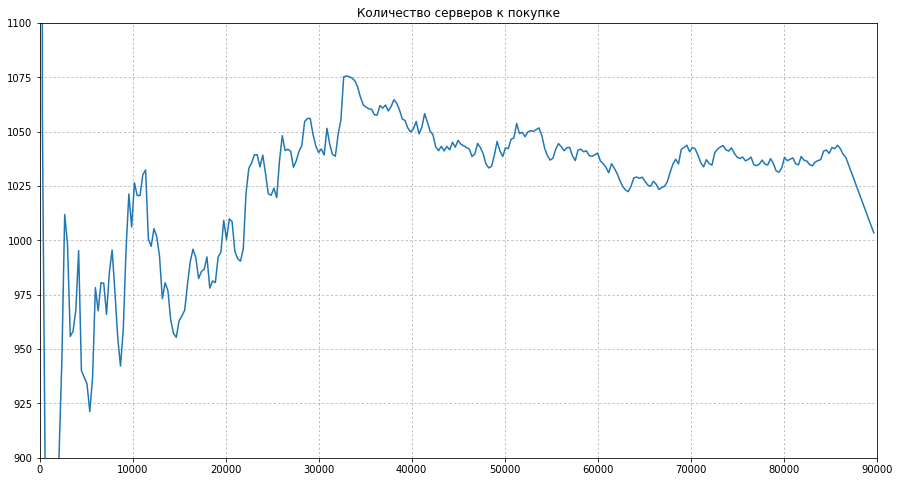

In [808]:
plt.figure(figsize=(15, 8))
plt.title('Количество серверов к покупке')
plt.plot(time, refined_prediction)
plt.xlim(0, t)
plt.ylim(900, 1100)
plt.grid(ls=':')
plt.show()

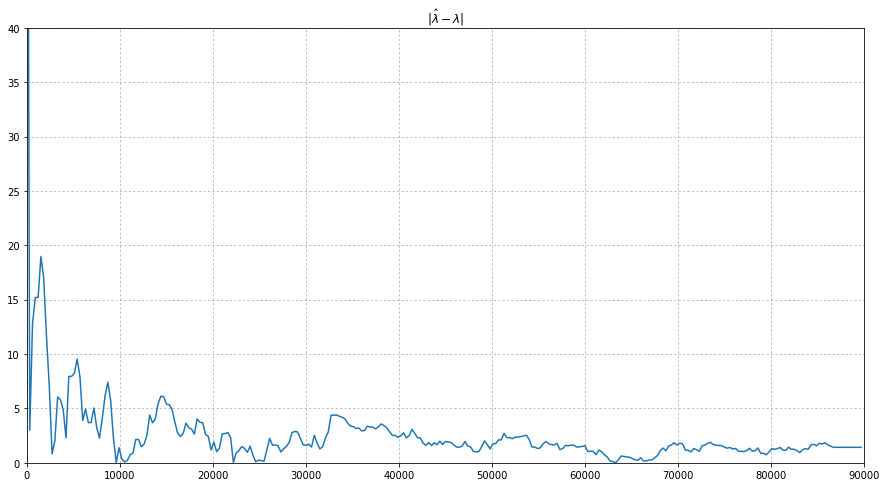

In [811]:
plt.figure(figsize=(15, 8))
plt.title(r'$|\^\lambda - \lambda|$')
plt.plot(time, np.abs(lambda_ - real_lambda))
plt.xlim(0, t)
plt.ylim(0, 40)
plt.grid(ls=':')
plt.show()

Мы оценили параметр $\lambda$ и смогли неплохо предсказать количество серверов к покупке. 

Данная оценка в целом получилась чуть завышена по сравнению с оценкой по реальной $\lambda$, и, к сожалению, в начале мы наооборот недооцениваем количество серверов.